In [1]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv
import numpy as np
 
start_value1= 1e-04
end_value1 = 8e-04


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 30)

csv_file = 'combinations.csv' 
 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

print(array)


[0.0001     0.00012414 0.00014828 0.00017241 0.00019655 0.00022069
 0.00024483 0.00026897 0.0002931  0.00031724 0.00034138 0.00036552
 0.00038966 0.00041379 0.00043793 0.00046207 0.00048621 0.00051034
 0.00053448 0.00055862 0.00058276 0.0006069  0.00063103 0.00065517
 0.00067931 0.00070345 0.00072759 0.00075172 0.00077586 0.0008    ]


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('TT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

# # The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns=t_header)
md_df = md_df.T
print('Modeling Results')
md_df *= 1e-6
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.0,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.1,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.2,5.720529,5.720505,5.720468,5.720411,5.720330,5.720219,5.720073,5.719886,5.719653,5.719369,...,5.712128,5.711073,5.709955,5.708776,5.707537,5.706241,5.704890,5.703486,5.702031,5.700529
0.3,5.720376,5.720230,5.720007,5.719686,5.719246,5.718667,5.717931,5.717022,5.715926,5.714632,...,5.686710,5.683030,5.679194,5.675211,5.671090,5.666841,5.662474,5.657997,5.653421,5.648755
0.4,5.719880,5.719381,5.718652,5.717645,5.716315,5.714626,5.712545,5.710050,5.707124,5.703761,...,5.640349,5.632660,5.624747,5.616631,5.608333,5.599874,5.591274,5.582552,5.573725,5.564811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,0.918768,0.817009,0.730944,0.657645,0.594809,0.540610,0.493591,0.452584,0.416667,0.385046,...,0.197570,0.188820,0.180859,0.173608,0.167035,0.161054,0.155590,0.150599,0.146036,0.141866
49.7,0.917133,0.815534,0.729609,0.656433,0.593706,0.539602,0.492668,0.451736,0.415888,0.384327,...,0.197240,0.188511,0.180569,0.173337,0.166783,0.160818,0.155368,0.150391,0.145841,0.141684
49.8,0.915504,0.814064,0.728278,0.655226,0.592607,0.538598,0.491749,0.450893,0.415112,0.383611,...,0.196912,0.188204,0.180281,0.173067,0.166532,0.160582,0.155148,0.150184,0.145647,0.141502
49.9,0.913881,0.812599,0.726953,0.654023,0.591511,0.537598,0.490833,0.450052,0.414339,0.382898,...,0.196585,0.187897,0.179994,0.172798,0.166283,0.160348,0.154928,0.149978,0.145454,0.141322


(0.0, 6.0)

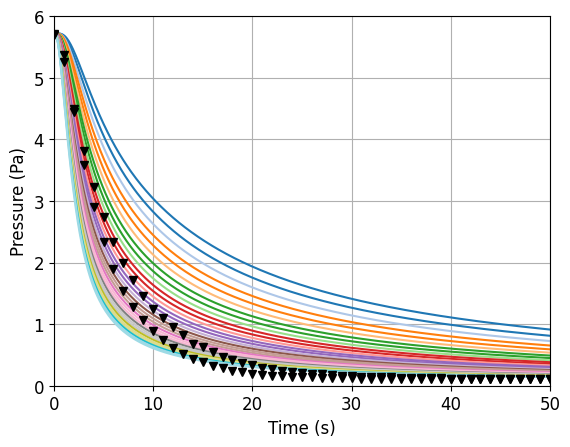

In [3]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['TT1_800_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_800_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 6)

minimum RMSE position:  18
minimum particle_diameter:  particle_diameter_1    0.000534
Name: 18, dtype: float64


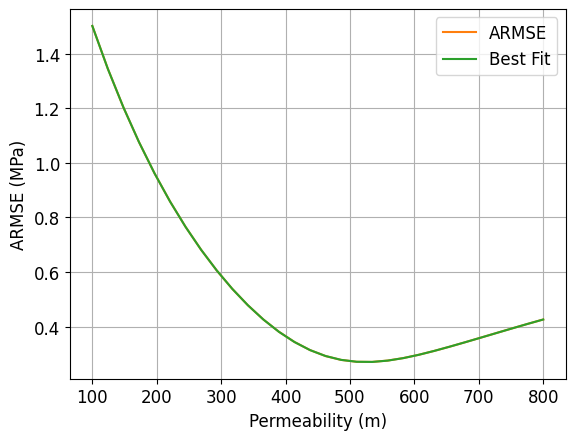

In [4]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = np.array([]) 

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_800_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)


parameters = pd.read_csv('combinations.csv')*1e6
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability (m)', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()



minimum RMSE position:  14
minimum particle_diameter:  particle_diameter_1    0.000438
Name: 14, dtype: float64


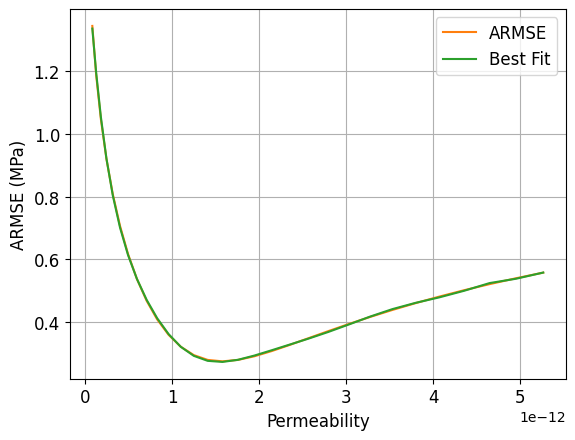

In [5]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = np.array([])

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_800_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 

index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)


parameters = pd.read_csv('combinations.csv')**2/150*0.001/(1-0.1)**2
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

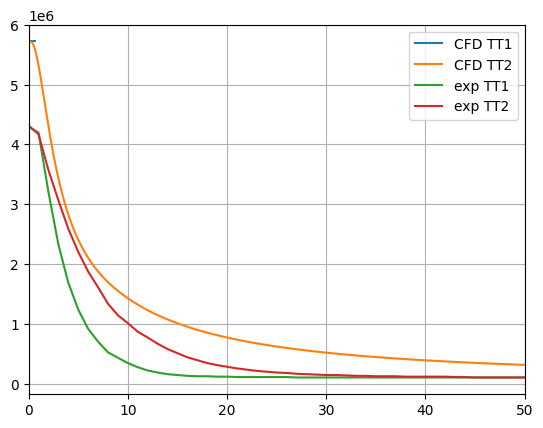

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


TT1_1 = pd.read_csv('model_pellets_1.csv')
TT1_2 = pd.read_csv('model_pellets_2.csv')
plt.plot(TT1_1['time'], TT1_1['inlet-p'], label = 'CFD TT1')
plt.plot(TT1_2['time'], TT1_2['inlet-p'], label = 'CFD TT2')
plt.plot(data20['time'], data20['TT1_600_1'], label = 'exp TT1')
plt.plot(data20['time'], data20['TT1_600_2'], label = 'exp TT2')
plt.grid()
plt.xlim(0, 50)
plt.legend()